<a href="https://colab.research.google.com/github/MJung-Jo/Learning-Fuzzing/blob/main/Fuzz_SQLite3_Fianl.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Get SQLCode From WebSite

### Extract only the values

* Extract only the values inside the `<code></code>` tags from the website

* 웹사이트에서 `<code></code>`태그 안의 값만 추출

In [ ]:
import requests
from bs4 import BeautifulSoup

In [ ]:
url = "https://www.sqlite.org/src/file?name=test/fts3e.test&ci=eddc05e7bb31fae7"

In [ ]:
response = requests.get(url)
html = response.text

# HTML 파싱
soup = BeautifulSoup(html, 'html.parser')

# <code> 태그 내용 추출
code_tag = soup.find('code')
code_content = code_tag.get_text()

print(code_content)

# 2008 July 29
#
# The author disclaims copyright to this source code.  In place of
# a legal notice, here is a blessing:
#
#    May you do good and not evil.
#    May you find forgiveness for yourself and forgive others.
#    May you share freely, never taking more than you give.
#
#*************************************************************************
# These tests exercise the various types of fts3 cursors.
#
# $Id: fts3e.test,v 1.1 2008/07/29 20:24:46 shess Exp $
#

set testdir [file dirname $argv0]
source $testdir/tester.tcl

# If SQLITE_ENABLE_FTS3 is not defined, omit this file.
ifcapable !fts3 {
  finish_test
  return
}

#*************************************************************************
# Test table scan (QUERY_GENERIC).  This kind of query happens for
# queries with no WHERE clause, or for WHERE clauses which cannot be
# satisfied by an index.
db eval {
  DROP TABLE IF EXISTS t1;
  CREATE VIRTUAL TABLE t1 USING fts3(c);
  INSERT INTO t1 (docid, c) VALUES (1, 'This i

### Extract only the code

* Extract only the code corresponding to the patterns

* 패턴에 해당하는 코드만 추출

In [ ]:
import re

In [ ]:
'''patterns에 해당되는 코드만 추출'''
# 아래 패턴에 해당하는 문자열만 가지고 오기
patterns = [
    r"SELECT.*?;",
    r"INSERT INTO.*?;",
    r"CREATE.*?;",
    r"DROP.*?;",
]

# 패턴에 대한 위치 정보 가져오기
queries = []
for pattern in patterns:
    queries.extend(re.finditer(pattern, code_content, re.DOTALL))

# 위치 정보를 기준으로 정렬
queries.sort(key=lambda x: x.start())

# TEST 추출된 문장 출력
'''
## list
for match in queries:
    print(match.group())
'''
## string
query = ""
for match in queries:
    query = query + match.group() + '\n'

print(query)

DROP TABLE IF EXISTS t1;
CREATE VIRTUAL TABLE t1 USING fts3(c);
INSERT INTO t1 (docid, c) VALUES (1, 'This is a test');
INSERT INTO t1 (docid, c) VALUES (2, 'That was a test');
INSERT INTO t1 (docid, c) VALUES (3, 'This is a test');
SELECT docid FROM t1 ORDER BY docid;
SELECT docid FROM t1 WHERE c LIKE '%test' ORDER BY docid;
SELECT docid FROM t1 WHERE c LIKE 'That%' ORDER BY docid;
DROP TABLE IF EXISTS t1;
DROP TABLE IF EXISTS t2;
CREATE VIRTUAL TABLE t1 USING fts3(c);
CREATE TABLE t2(id INTEGER PRIMARY KEY AUTOINCREMENT, weight INTEGER UNIQUE);
INSERT INTO t2 VALUES (null, 10);
INSERT INTO t1 (docid, c) VALUES (last_insert_rowid(), 'This is a test');
INSERT INTO t2 VALUES (null, 5);
INSERT INTO t1 (docid, c) VALUES (last_insert_rowid(), 'That was a test');
INSERT INTO t2 VALUES (null, 20);
INSERT INTO t1 (docid, c) VALUES (last_insert_rowid(), 'This is a test');
SELECT docid FROM t1 WHERE docid in (1, 2, 10);
SELECT rowid FROM t1 WHERE rowid in (1, 2, 10);
SELECT docid, weight FROM t

### SQLite3 execute

In [ ]:
import sqlite3

In [ ]:
# 참고 [https://github.com/hassanazimi/Python/blob/master/16%20Databases/sqlite3-class.py]
class sqlite3_:
    @property
    def filename(self): return self._filename
    @filename.setter
    def filename(self, fn):
        self._filename = fn
        self._db = sqlite3.connect(fn)
        self._db.row_factory = sqlite3.Row
    @filename.deleter
    def filename(self): self.close()
    @property
    def table(self): return self._table
    @table.setter
    def table(self, t): self._table = t
    @table.deleter
    def table(self): self._table = 'test'

    def close(self):
            self._db.close()
            del self._filename

    def __init__(self, **kwargs):
        self.filename = kwargs.get('filename')
        self.table = kwargs.get('table', 'test')


    # 실행 코드
    def sql_do(self, sql, *params):
        self._db.execute(sql, params)
        self._db.commit()

In [ ]:
def main_SQLite(query):
    db = sqlite3_(filename = 'SQLFuzzer', table = 'SQLFuzzer')

    # string -> List
    queries = query.replace('\n', '').split(';')
    ## 공백 및 빈 문자열 제거
    queries = [query.strip() for query in queries if query.strip()]
    for query in queries:
        db.sql_do(query+";")

    db.close()

# GreyBox Fuzzing

## INSTALL

In [ ]:
pip install fuzzingbook

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## IMPORT

In [ ]:
from typing import List, Set, Dict, Sequence, cast, Any, Tuple, Union, Callable
from collections.abc import Sequence

import random
import time

import sqlparse

import matplotlib.pyplot as plt
import numpy as np

In [ ]:
from fuzzingbook.Fuzzer import Fuzzer, Runner
from fuzzingbook.MutationFuzzer import FunctionCoverageRunner
from fuzzingbook.GreyboxFuzzer import Mutator, Seed, PowerSchedule, AdvancedMutationFuzzer
from fuzzingbook.Coverage import population_coverage
from fuzzingbook.GrammarCoverageFuzzer import SimpleGrammarCoverageFuzzer
from fuzzingbook.GreyboxGrammarFuzzer import FragmentMutator, SeedWithStructure
from fuzzingbook.Parser import EarleyParser

## Basic Greybox Fuzzer

In [ ]:
class BasicGreyboxFuzzer(AdvancedMutationFuzzer):
    """Coverage-guided mutational fuzzing."""

    def reset(self):
        super().reset()
        self.coverages_seen = set()
        self.population = []  # population is filled during greybox fuzzing

    def run(self, runner: FunctionCoverageRunner) -> Tuple[Any, str]:

        result, outcome = super().run(runner)
        new_coverage = frozenset(runner.coverage())
        if new_coverage not in self.coverages_seen:
            # We have new coverage
            seed = Seed(self.inp)
            seed.coverage = runner.coverage()
            self.coverages_seen.add(new_coverage)
            self.population.append(seed)

        return (result, outcome)

## Boosted Greybox Fuzzer

In [ ]:
import pickle   # 개체의 모든 정보에서 바이트 배열을 생성하여 개체를 직렬화
import hashlib  # 바이트 배열에서 128비트 해시 값을 생성

In [ ]:
def getPathID(coverage: Any) -> str:
    """Returns a unique hash for the covered statements"""
    pickled = pickle.dumps(sorted(coverage))
    return hashlib.md5(pickled).hexdigest()

In [ ]:
class AFLFastSchedule(PowerSchedule):
    """Exponential power schedule as implemented in AFL"""

    def __init__(self, exponent: float) -> None:
        self.exponent = exponent

    def assignEnergy(self, population: Sequence[Seed]) -> None:
        """Assign exponential energy inversely proportional to path frequency"""
        for seed in population:
            seed.energy = 1 / (self.path_frequency[getPathID(seed.coverage)] ** self.exponent)

In [ ]:
class BoostedGreyboxFuzzer(BasicGreyboxFuzzer):
    def reset(self):
        super().reset()
        self.schedule.path_frequency = {}

    def run(self, runner: FunctionCoverageRunner) -> Tuple[Any, str]:
        result, outcome = super().run(runner)

        path_id = getPathID(runner.coverage())
        if path_id not in self.schedule.path_frequency:
            self.schedule.path_frequency[path_id] = 1
        else:
            self.schedule.path_frequency[path_id] += 1

        return(result, outcome)

## Grammar Greybox Fuzzer

In [ ]:
SimpleGrammar = Dict[str, List[str]]
Option = Dict[str, Any]
Expansion = Union[str, Tuple[str, Option]]

Grammar = Dict[str, List[Expansion]]

In [ ]:
str_value = ["str0", "str1", "str2", "str3", "str4", "str5", "str6", "str7", "str8", "str9"]
int_value = []
for i in range(100):
    int_value.append(str(i))

sqlite_grammar: Grammar = {
     "<start>": ["<query>"]

    ,"<query>": ["DROP TABLE IF EXISTS <table> ;",
                 "SELECT <columns> FROM <table> ;",
                 "SELECT <table>.<columns> FROM <table> ;",
                 "SELECT <columns> FROM <table> ORDER BY <columns>;",
                 "INSERT INTO <table> (<columns>) VALUES (<values>);"]

    ,"<columns>": ["<column>", "<column>, <columns>"]
    ,"<column>": ["*", "<column_name>", "<column_name> AS <alias>"]
    ,"<table>": ["t1", "t2"]
    ,"<column_name>": ["c1", "c2", "c3"]
    ,"<alias>": ["<table>"]
    ,"<values>": ["<str_values>", "<int_values>"]
    ,"<str_values>": ["<str_value>", "<str_value>, <str_values>"]
    ,"<str_value>": str_value

    ,"<int_values>": ["<int_value>", "<int_value>, <int_values>"]
    ,"<int_value>": int_value
}

In [ ]:
sql_TOKENS: Set[str] = {
    "<start>": "Start",
    "<query>": "Query",
    "<columns>": "Columns",
    "<column>": "Column",
    "<table>": "Table",
    "<column_name>": "Column Name",
    "<alias>": "Alias",
    "<values>": "Values",
    "<str_values>": "String Values",
    "<str_value>": "String Value",
    "<int_values>": "Integer Values",
    "<int_value>": "Integer Value",
}

In [ ]:
class GrammarGreyboxFuzzer(BasicGreyboxFuzzer):
    def __init__(self, seeds: List[str],
                 byte_mutator: Mutator, tree_mutator: FragmentMutator,
                 schedule: PowerSchedule) -> None:

        super().__init__(seeds, byte_mutator, schedule)
        self.tree_mutator = tree_mutator

    def create_candidate(self) -> str:
        seed = cast(SeedWithStructure, self.schedule.choose(self.population))

        # Structural mutation
        trials = random.randint(0, 4)
        for i in range(trials):
            seed = self.tree_mutator.mutate(seed)

        # Byte-level mutation
        candidate = seed.data
        if trials == 0 or not seed.has_structure or random.randint(0, 1) == 1:
            dumb_trials = min(len(seed.data), 1 << random.randint(1, 5))
            for i in range(dumb_trials):
                candidate = self.mutator.mutate(candidate)

        return candidate

## TEST

* **my_sql_parser** SQL구문의 Parsing을 도와주는 함수

In [ ]:
def my_sql_parser(query: str) -> None:
    parser = sqlparse.parse(query, encoding=None)

In [ ]:
n = 100
seed_input = query

### Run-Time

In [ ]:
# BasicGreyboxFuzzer
Basic_Greybox_fuzzer = BasicGreyboxFuzzer([seed_input], Mutator(), PowerSchedule())

start = time.time()
Basic_Greybox_fuzzer.runs(FunctionCoverageRunner(my_sql_parser), trials=n)
end = time.time()

basic_run_time = end - start
"%d 입력을 생성하고 실행하는 데 Basic_Greybox_fuzzer %0.2f초가 걸렸습니다." % (n, basic_run_time)


PYDEV DEBUGGER WARNING:
sys.settrace() should not be used when the debugger is being used.
This may cause the debugger to stop working correctly.
If this is needed, please check: 
http://pydev.blogspot.com/2007/06/why-cant-pydev-debugger-work-with.html
to see how to restore the debug tracing back correctly.
Call Location:
  File "/usr/local/lib/python3.10/dist-packages/fuzzingbook/Coverage.py", line 367, in __enter__
    sys.settrace(self.traceit)


PYDEV DEBUGGER WARNING:
sys.settrace() should not be used when the debugger is being used.
This may cause the debugger to stop working correctly.
If this is needed, please check: 
http://pydev.blogspot.com/2007/06/why-cant-pydev-debugger-work-with.html
to see how to restore the debug tracing back correctly.
Call Location:
  File "/usr/local/lib/python3.10/dist-packages/fuzzingbook/Coverage.py", line 373, in __exit__
    sys.settrace(self.original_trace_function)



'100 입력을 생성하고 실행하는 데 Basic_Greybox_fuzzer 70.76초가 걸렸습니다.'

In [ ]:
# BoostedGreyboxFuzzer
Boosted_Greybox_Fuzzer = BoostedGreyboxFuzzer([seed_input], Mutator(), AFLFastSchedule(5))

start = time.time()
Boosted_Greybox_Fuzzer.runs(FunctionCoverageRunner(my_sql_parser), trials=n)
end = time.time()

boosted_run_time = end - start
"%d 입력을 생성하고 실행하는 데 Boosted_Greybox_Fuzzer %0.2f초가 걸렸습니다." % (n, boosted_run_time)

'100 입력을 생성하고 실행하는 데 Boosted_Greybox_Fuzzer 78.63초가 걸렸습니다.'

In [ ]:
# GrammarGreyboxFuzzer
tree_mutator = FragmentMutator(EarleyParser(sqlite_grammar, tokens=sql_TOKENS))
Grammar_Greybox_Fuzzer = GrammarGreyboxFuzzer([seed_input], Mutator(), tree_mutator, PowerSchedule())

start = time.time()
Grammar_Greybox_Fuzzer.runs(FunctionCoverageRunner(my_sql_parser), trials=n)
end = time.time()

grammar_run_time = end - start

"%d 입력을 생성하고 실행하는 데 Grammar_Greybox_Fuzzer %0.2f초가 걸렸습니다." % (n, grammar_run_time)

'100 입력을 생성하고 실행하는 데 Grammar_Greybox_Fuzzer 67.02초가 걸렸습니다.'

Comparison

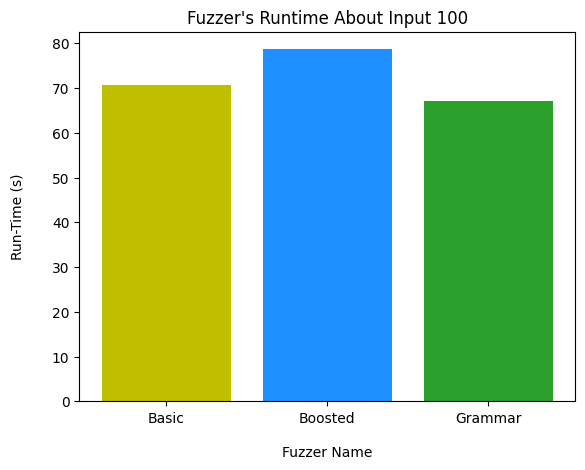

In [ ]:
x = np.arange(3)
fuzzer_nm = ['Basic', 'Boosted', 'Grammar']
run_time = [basic_run_time, boosted_run_time, grammar_run_time]
colors = ['y', 'dodgerblue', 'C2']

plt.bar(x, run_time, color=colors)
plt.xticks(x, fuzzer_nm)
plt.title("Fuzzer's Runtime About Input "+str(n))
plt.xlabel('Fuzzer Name', labelpad=15)
plt.ylabel('Run-Time (s)', labelpad=20)

plt.show()

### Coverage

In [ ]:
_, Basic_Greybox_coverage = population_coverage(Basic_Greybox_fuzzer.inputs, my_sql_parser)


In [ ]:
_, Boosted_Greybox_coverage = population_coverage(Boosted_Greybox_Fuzzer.inputs, my_sql_parser)


In [ ]:
_, Grammar_Greybox_coverage = population_coverage(Grammar_Greybox_Fuzzer.inputs, my_sql_parser)


Comparison

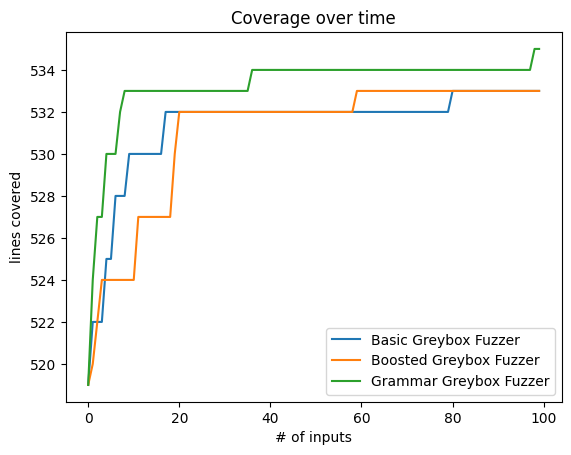

In [ ]:
line_grey, = plt.plot(Basic_Greybox_coverage, label="Basic Greybox Fuzzer")
line_boost, = plt.plot(Boosted_Greybox_coverage, label="Boosted Greybox Fuzzer")
line_grammar, = plt.plot(Grammar_Greybox_coverage, label="Grammar Greybox Fuzzer")

plt.legend(handles=[line_boost, line_grey, line_grammar])
plt.title('Coverage over time')
plt.xlabel('# of inputs')
plt.ylabel('lines covered');
plt.legend(loc='lower right')

plt.show()